#Titanic Data Analysis

#Problem Statement:


The goal is to understand the key factors that influenced survival rates on the Titanic by conducting bivariate and multivariate analysis. Specifically, we want to explore the relationships between multiple variables to determine which factors most significantly affected the likelihood of survival.

Key Variables for Analysis:

Dependent Variable:
- Survived (whether a passenger survived or not)

Independent Variables:
- Pclass (Passenger class: socio-economic status)
- Sex (Gender)
- Age
- SibSp (Number of siblings/spouses aboard)
- Parch (Number of parents/children aboard)
- Fare
- Embarked (Port of embarkation)

### Importing libraries and assessing structure of the dataset

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

In [3]:
#Loading the cleaned dataset
df=pd.read_csv('titanic_dataset_cleaned.csv')

In [5]:
df.shape

(889, 12)

In [7]:
df.head(10)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
6,6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [9]:
df.nunique()

Unnamed: 0     889
PassengerId    889
Survived         2
Pclass           3
Name           889
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         680
Fare           247
Embarked         3
dtype: int64

In [ ]:
# List of continuous (numerical) columns in the dataset
cont_cols = ["Fare", "Age"]

# List of categorical columns in the dataset
# Survived, Pclass, Sex, SibSp, Parch, and Embarked are categorical variables
cat_cols = ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Embarked"]

# List of identifier columns in the dataset
# These columns uniquely identify passengers but do not contribute to the analysis
id_cols = ["PassengerId", "Name", "Ticket"]

## Bivariate Analysis

### Scatterplot

This plot shows the relationship between two continuous (numerical) variables.

### Poll Question 1

Choose the correct code option to make a scatterplot using Seaborn:

(a) sns.scatter(df["Age"],df["Fare"])

(b) sns.scatterplot(df["Age"],df["Fare"])  ans:   sns.scatterplot(x=df["Age"],y=df["Fare"])  

(c) sns.Scatterplot(df["Age"],df["Fare"])

(d) sns.plot(df["Age"],df["Fare"])

###Boxplot

A continuous variable `Fare`, with a categorical  variable `Pclass`.

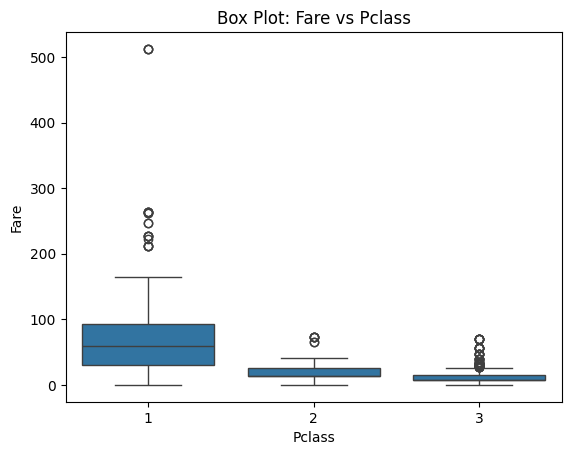

In [ ]:
# Boxplot of Fare with Pclass
#sns.boxplot(x='Pclass', y='Fare')
sns.boxplot(x=df["Pclass"],y=df["Fare"])
plt.title('Box Plot: Fare vs Pclass')
plt.show()

-  1st class (Pclass = 1) have a much wider fare distribution, with some extresme outliers who paid significantly higher fares.

- 2nd class (Pclass = 2) passengers generally paid moderate fares, with less variation compared to 1st class.

- 3rd class (Pclass = 3) passengers paid the lowest fares, and the fare distribution is more compact, with fewer outliers.

Survived Vs Fare


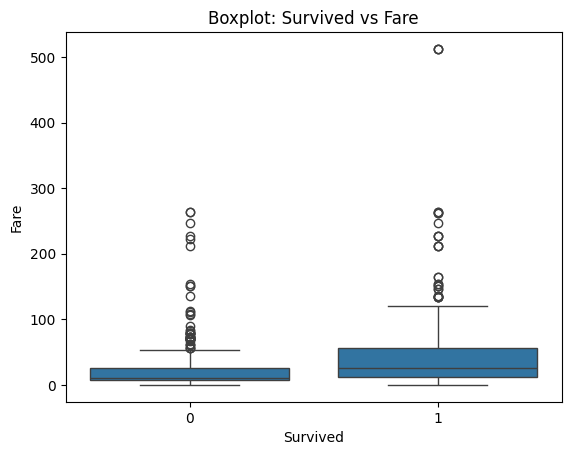

Survived Vs Age


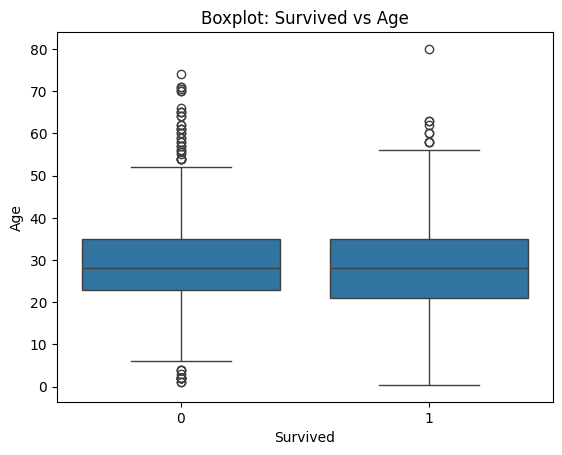

Pclass Vs Fare


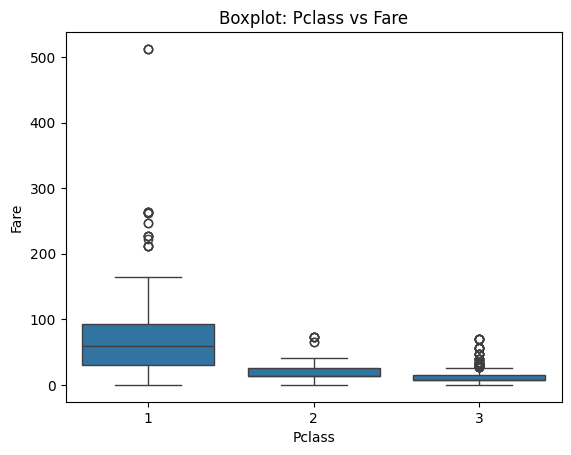

Pclass Vs Age


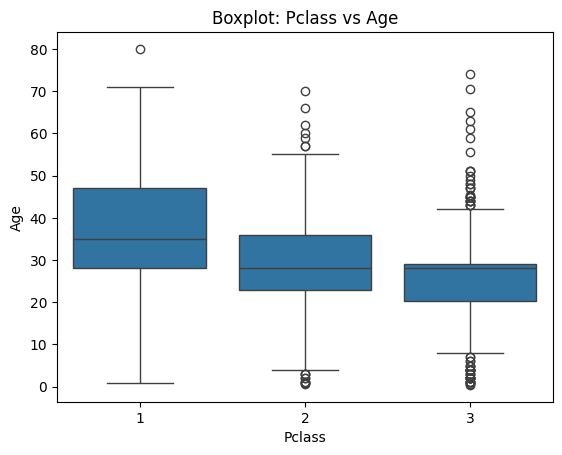

Sex Vs Fare


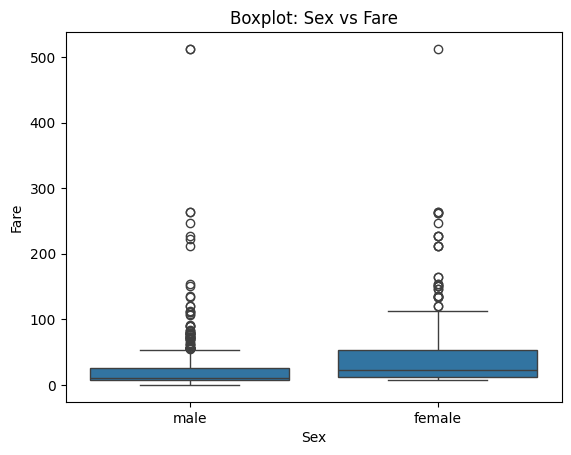

Sex Vs Age


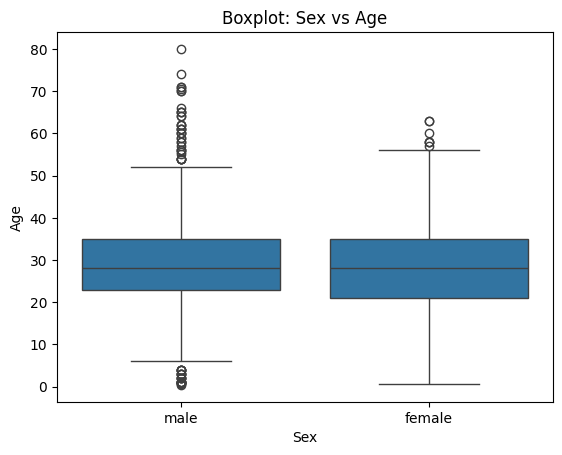

SibSp Vs Fare


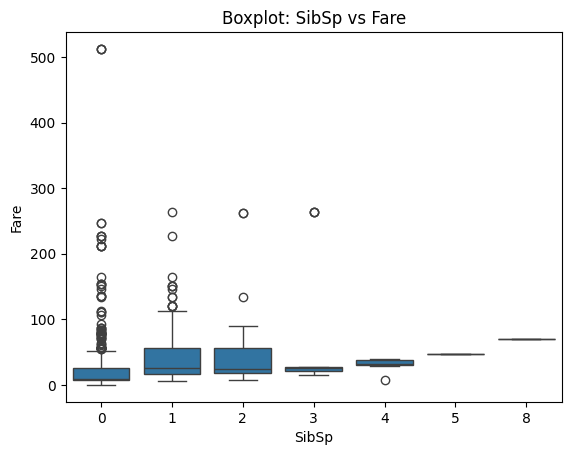

SibSp Vs Age


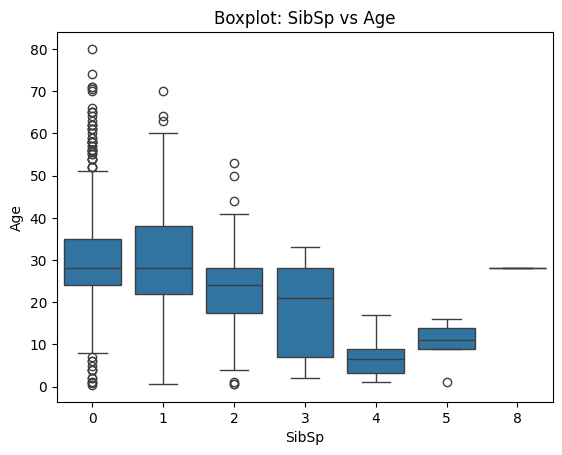

Parch Vs Fare


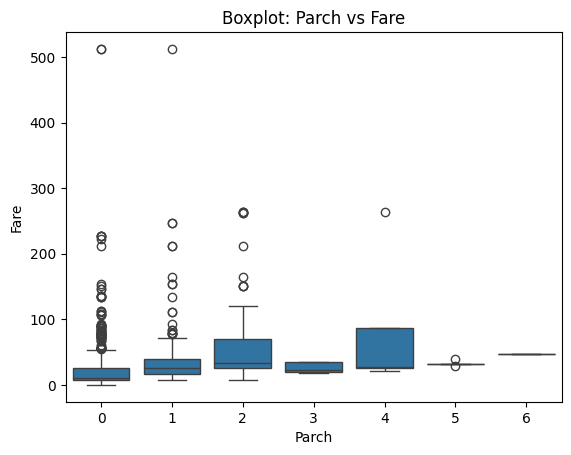

Parch Vs Age


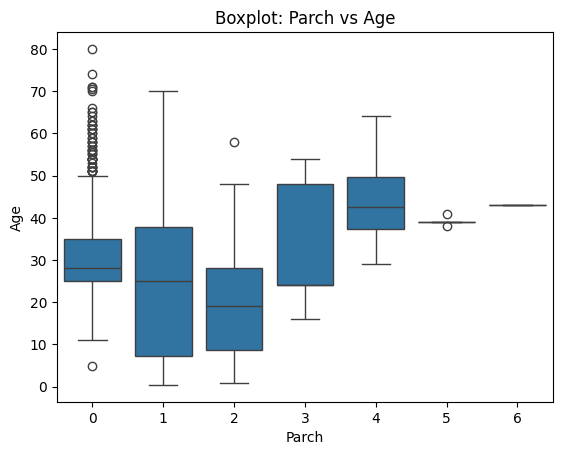

Embarked Vs Fare


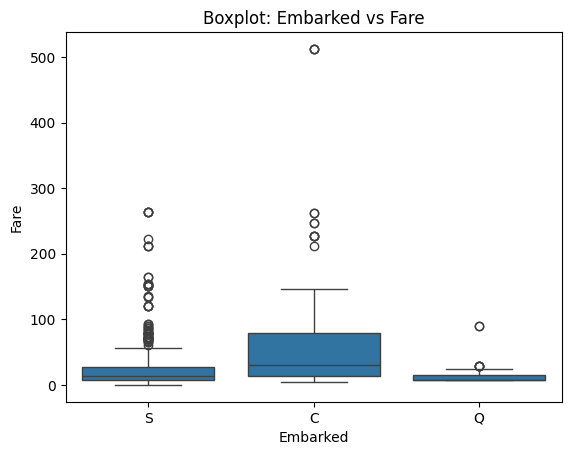

Embarked Vs Age


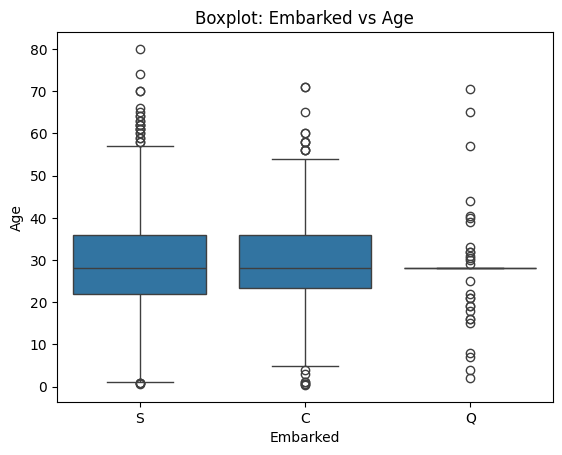

In [ ]:
ls = []

for i in cat_cols:
    for j in cont_cols:
        print(i, "Vs", j)
        ls.append((i, j))
        sns.boxplot(x=df[i], y=df[j])  # Explicitly set x and y for the boxplot
        plt.title(f'Boxplot: {i} vs {j}')
        plt.show()

Observations -
- The median fare for those who survived is greater than the ones who did not (higher fare spread for the ones who survived).

- The median age for those who survived and those who didn't are similar.

These are a few observations from the plotted graphs. We can make similar inferences for the others. However, not all inferences may be useful for our analysis.

### Barplot

It is used to see statistical distribution (mean/median/var/std dev/max/min etc) of a continuous variable against a categorical variable.

<Axes: xlabel='Pclass', ylabel='Fare'>

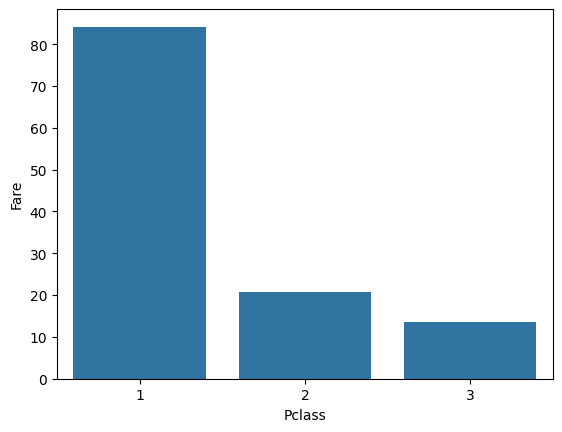

In [ ]:
sns.barplot(x=df["Pclass"],y=df["Fare"],ci=None)

By default, the mean fare is plotted for all the classes for the above barplot.

- 1st class passengers paid significantly higher fares compared to those in 2nd and 3rd Class. This is evident from the much higher average fare for 1st class.

- 2nd class passengers paid moderate fares, which are substantially lower than 1st class but higher than 3rd class.

- 3rd Class passengers paid the lowest fares, as expected, given the more modest accommodations.

Survived Vs Fare


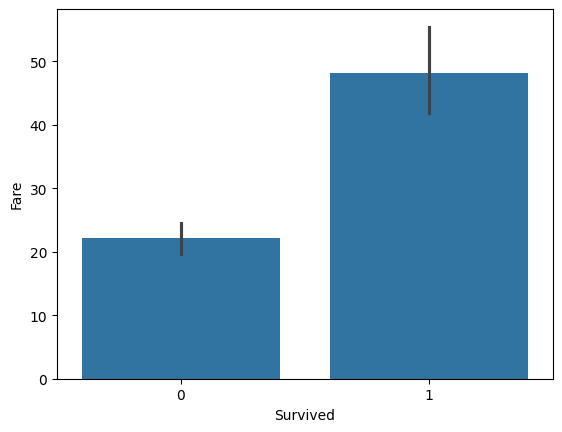

Survived Vs Age


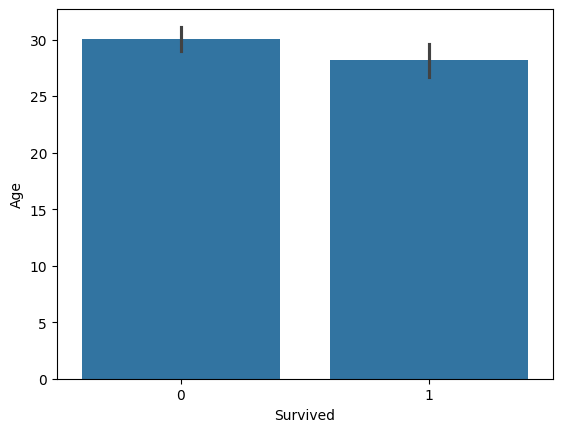

Pclass Vs Fare


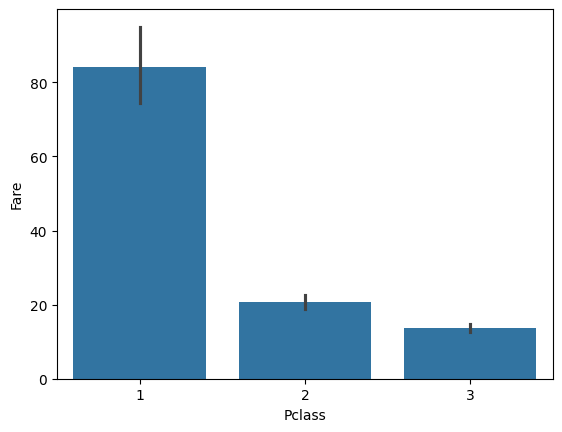

Pclass Vs Age


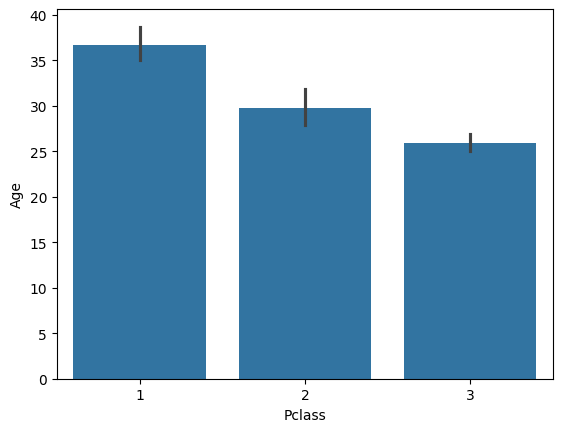

Sex Vs Fare


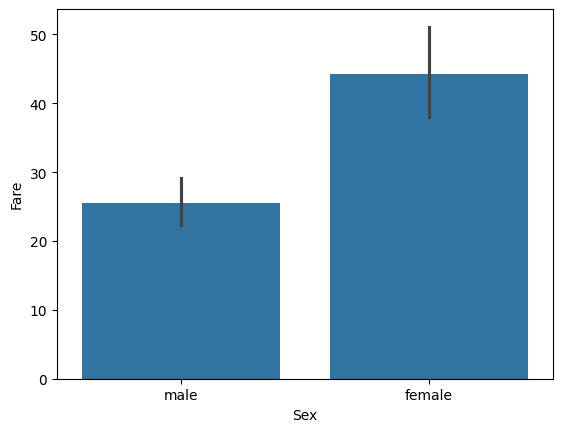

Sex Vs Age


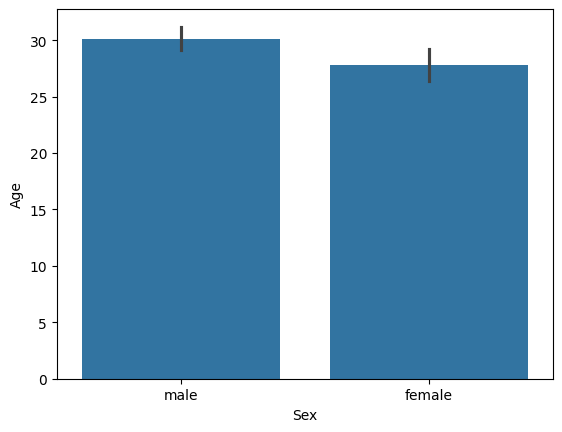

SibSp Vs Fare


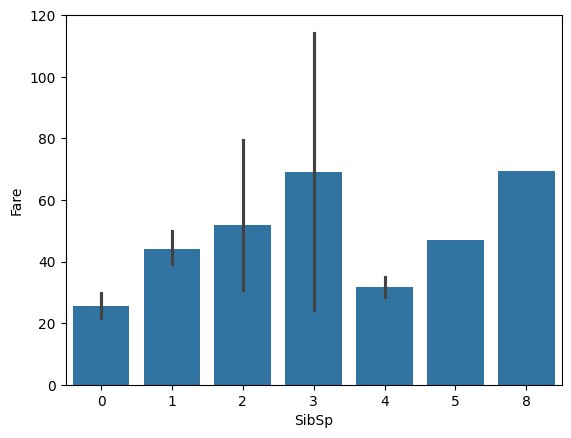

SibSp Vs Age


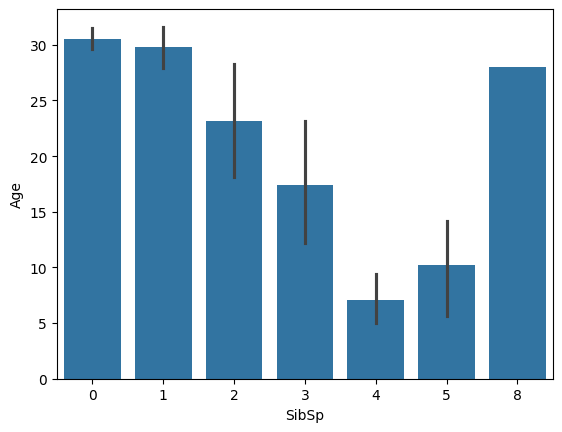

Parch Vs Fare


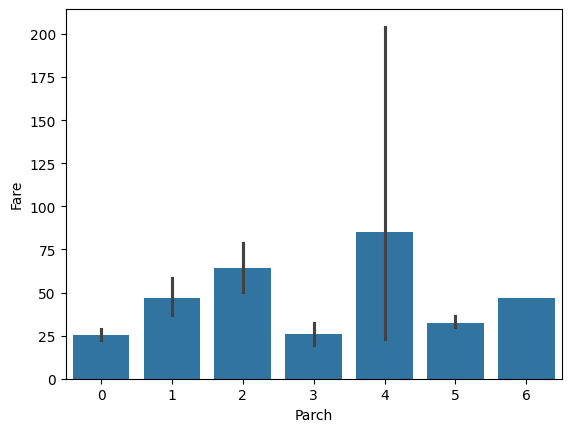

Parch Vs Age


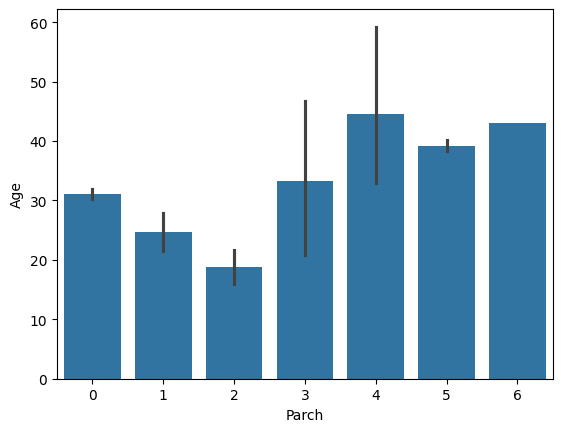

Embarked Vs Fare


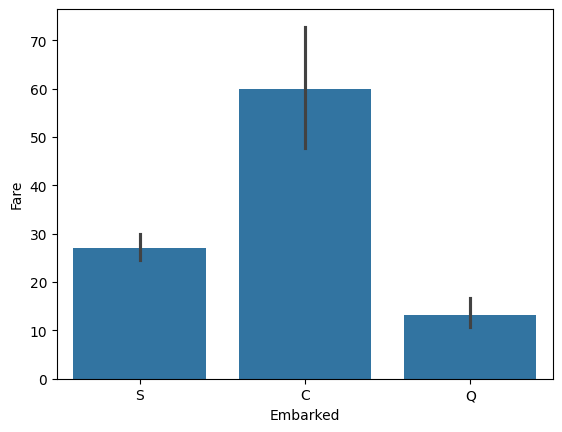

Embarked Vs Age


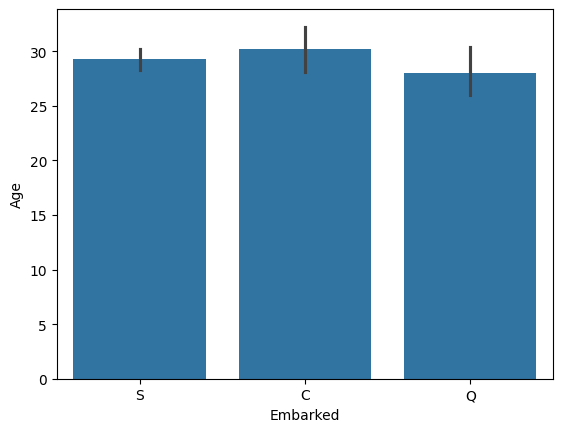

[('Survived', 'Fare'),
 ('Survived', 'Age'),
 ('Pclass', 'Fare'),
 ('Pclass', 'Age'),
 ('Sex', 'Fare'),
 ('Sex', 'Age'),
 ('SibSp', 'Fare'),
 ('SibSp', 'Age'),
 ('Parch', 'Fare'),
 ('Parch', 'Age'),
 ('Embarked', 'Fare'),
 ('Embarked', 'Age'),
 ('Survived', 'Fare'),
 ('Survived', 'Age'),
 ('Pclass', 'Fare'),
 ('Pclass', 'Age'),
 ('Sex', 'Fare'),
 ('Sex', 'Age'),
 ('SibSp', 'Fare'),
 ('SibSp', 'Age'),
 ('Parch', 'Fare'),
 ('Parch', 'Age'),
 ('Embarked', 'Fare'),
 ('Embarked', 'Age')]

In [ ]:
for i in cat_cols:
    for j in cont_cols:
        print(i,"Vs",j)
        ls.append((i,j))
        sns.barplot(x=df[i], y=df[j])
        plt.show()
ls

The whiskers in the barplot denote confidence intervals (by default, it is 95%).

From the 1st graph (survived vs fare), we can say that the mean fare is higher for those who survived. We can make similar inferences from the other graphs. However, not all information may be useful for analysis.

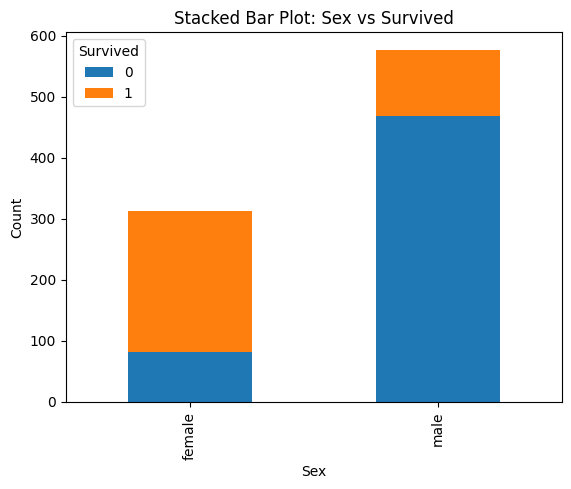

In [ ]:
#Plotting a stacked bar chart for Survived and Sex

pd.crosstab(df['Sex'], df['Survived']).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot: Sex vs Survived')
plt.ylabel('Count')
plt.show()

The above stacked bar graph (gender vs survived) is an example of categorical-categorical analysis.

###Pairplot

Pairplot is used to see pairwise relationships between two continuous (numerical) variables in a dataset.

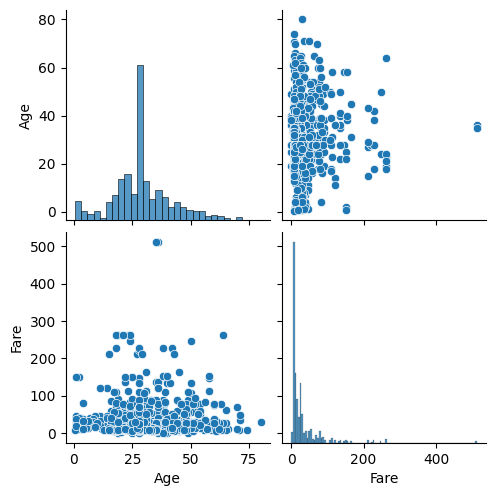

In [ ]:
sns.pairplot(df[['Age', 'Fare']].dropna())
plt.show()

Top-left: Most of the passengers are within the age range of 15-50 years with the max. no. of passengers at around 30 years.

Bottom-right: The fare distribution is highly right-skewed, with most passengers paying lower fares. A small number of passengers paid significantly higher fares (outliers in the dataset), typically those in first class.

For the remaining two plots, inferences have been earlier.

###Countplot

Countplot showing the number of passengers by `Pclass` and `Survived`:

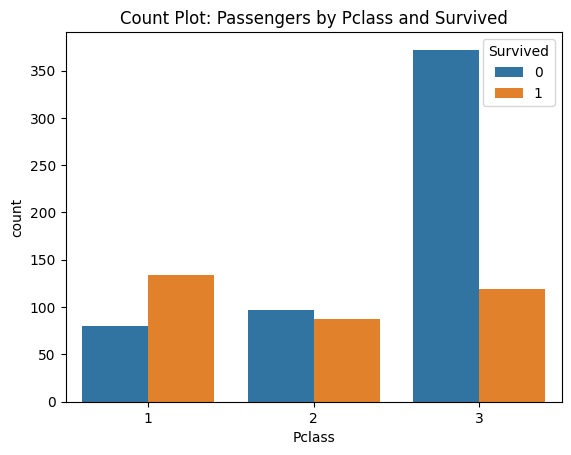

In [ ]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Count Plot: Passengers by Pclass and Survived')
plt.show()

- 1st Class: A higher proportion of 1st class passengers survived compared to those who did not survive. This suggests that passengers in 1st class had a better chance of survival.

- 2nd Class: In 2nd class, the survival and non-survival counts are more balanced, although there are slightly more survivors than non-survivors.

- 3rd Class: A much larger proportion of 3rd class passengers did not survive. The count of non-survivors in 3rd class is significantly higher than the survivors, indicating a lower survival rate for these passengers.


###KDE Plot

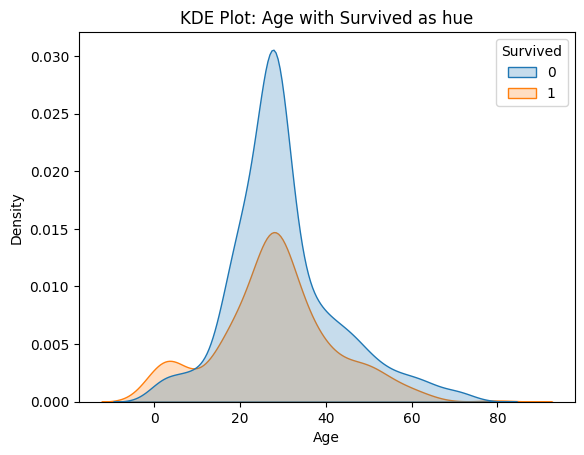

In [ ]:
# KDE plot to show density distribution of Age and Fare
sns.kdeplot(data=df, x='Age', hue='Survived', fill=True)
plt.title('KDE Plot: Age with Survived as hue')
plt.show()

The density of survivors as well as non-survivors is relatively high between the ages of $20$ and $40$, with a slight peak around the mid-20s. This suggests there is not much difference in chances of survival for younger adults.

### Task - 1 (Boxplot)


1 - Import the libraries necessary for Data Visualization.

2 - Set the size of the figure to (10 , 6).

3 - Create a box plot for MonthlyCharges vs. Churn.

4 - Define the title, x & y label.

5 - Display the plot and note your observations.

In [1]:
#Code here

### Task - 2 (Barplot)
1 - Display the distribution of each predictor variable with respect to the churn status (exclude the columns 'Churn', 'TotalCharges', 'MonthlyCharges', 'customerID', and 'tenure').

2 - Display the plot and note your observations.

In [1]:
#Code here

## Multivariate Analysis

###Scatterplot

The scatter plot represents the relationship between `Age` and `Fare` from the dataset, while also differentiating the data points based on whether the passenger survived or not.

<Axes: xlabel='Age', ylabel='Fare'>

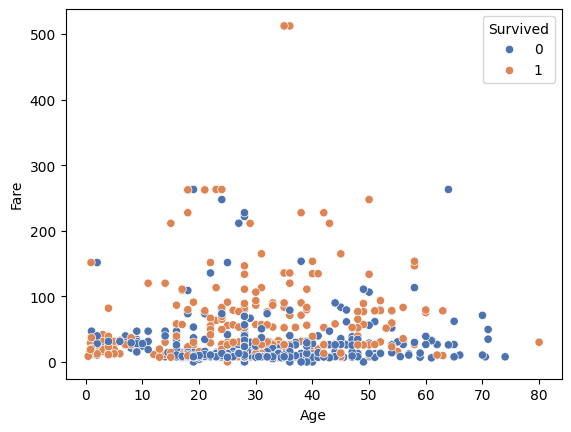

In [ ]:
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', palette='deep')

Survivors (colored differently in the plot) are scattered across various age groups, though there seems to be a higher concentration of survivors in passengers aged $20$ to $40$, with a notable number of survivors paying higher fares.
Non-survivors are spread more evenly across all age groups, with a larger number of them paying lower fares, especially below $100$.

###Boxplot

A categorical variable `Survived` with a continuous variable `Fare`, with a categorical  variable `Pclass`.

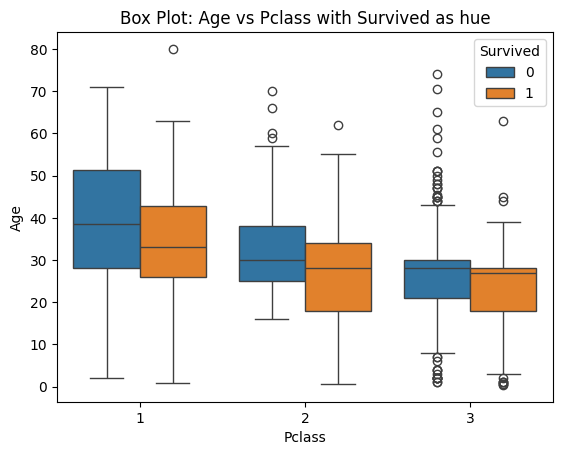

In [ ]:
# Box plot of Fare with Survived as hue
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=df)
plt.title('Box Plot: Age vs Pclass with Survived as hue')
plt.show()

- 1st Class: The age distribution is more spread out, with a wider range of ages compared to the other classes. There are both survivors and non-survivors across almost the entire age range, though there are more elderly survivors in 1st class compared to other classes.
- 2nd Class: The age distribution in 2nd class is tighter, with most passengers being younger (between 20 and 50). There is a significant number of survivors in this age range.
- 3rd Class: The passengers in 3rd class are generally younger, with the median age much lower than in the other classes. However, this class also has a lot of outliers w.r.t. the age of survived passengers.


### Barplot

<Axes: xlabel='Pclass', ylabel='Fare'>

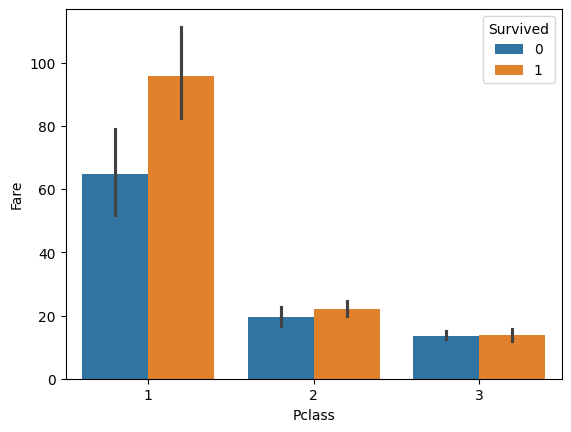

In [ ]:
sns.barplot(data=df, x='Pclass', y='Fare', hue='Survived')

- 1st Class: The total fare paid by 1st class passengers is significantly higher than in other classes, both for survivors and non-survivors. The mean fare for survivors in 1st class is notably higher than for non-survivors.
- 2nd Class: The total fare in 2nd class is much lower compared to 1st class. Survivors in 2nd class contributed more to the total fare than non-survivors.
-3rd Class: While the total fare paid by 3rd class passengers is the lowest, there is a larger contribution from non-survivors. Non-survivors in 3rd class contributed more to the total fare than survivors.

Survived Vs Fare


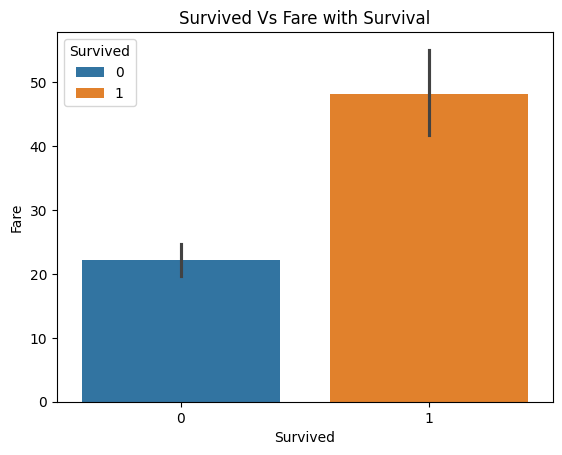

Survived Vs Age


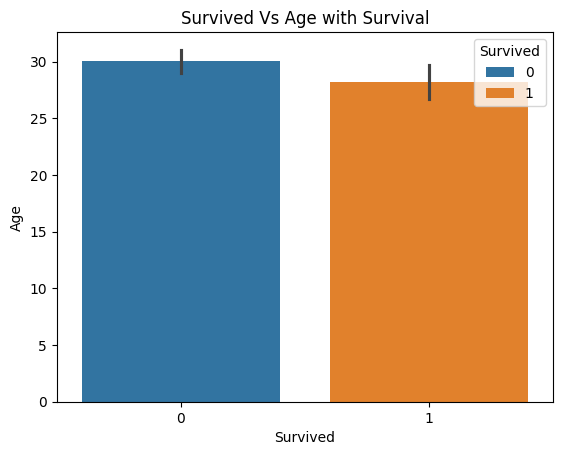

Pclass Vs Fare


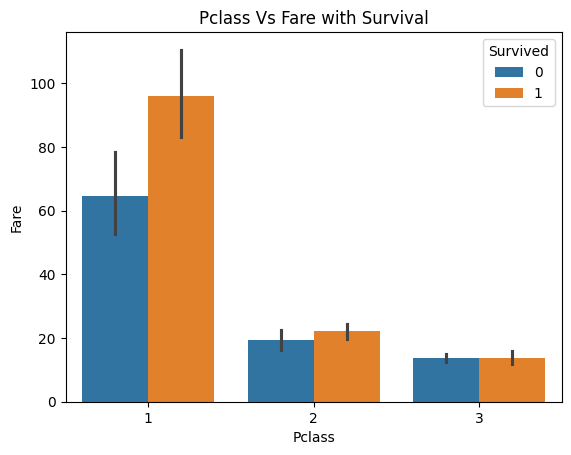

Pclass Vs Age


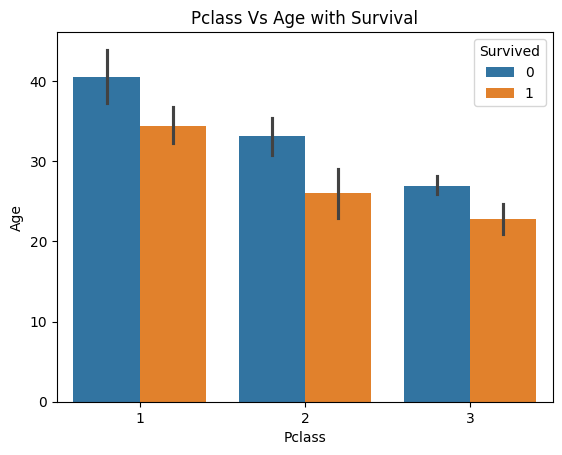

Sex Vs Fare


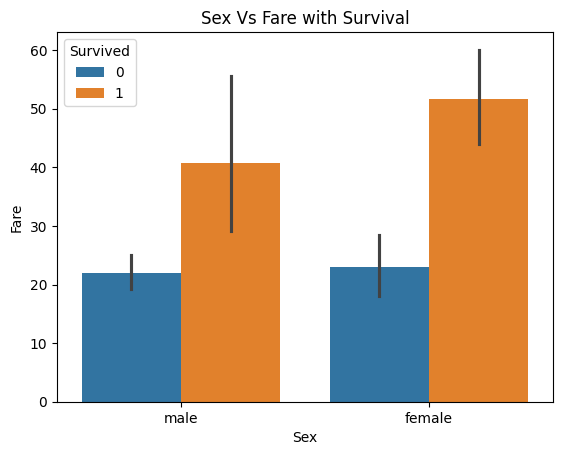

Sex Vs Age


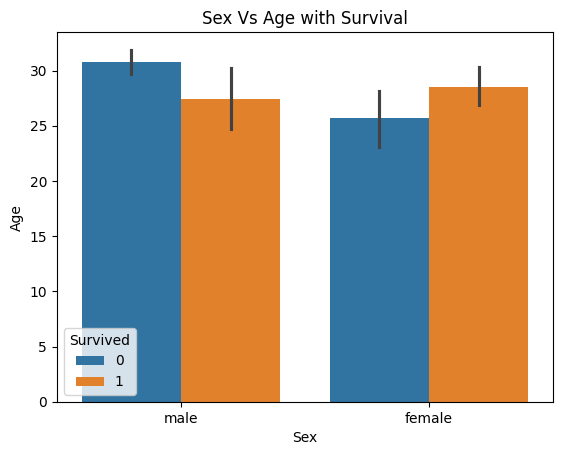

SibSp Vs Fare


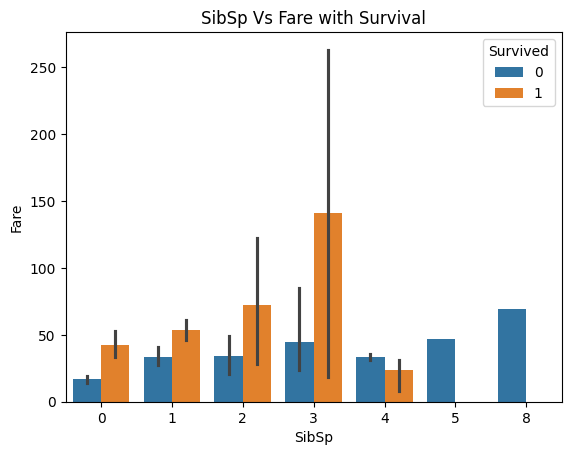

SibSp Vs Age


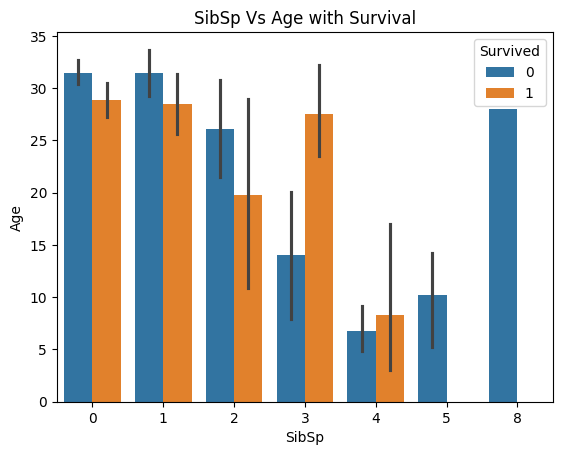

Parch Vs Fare


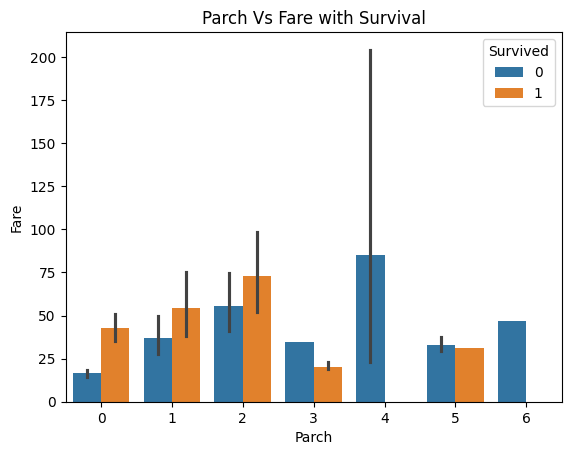

Parch Vs Age


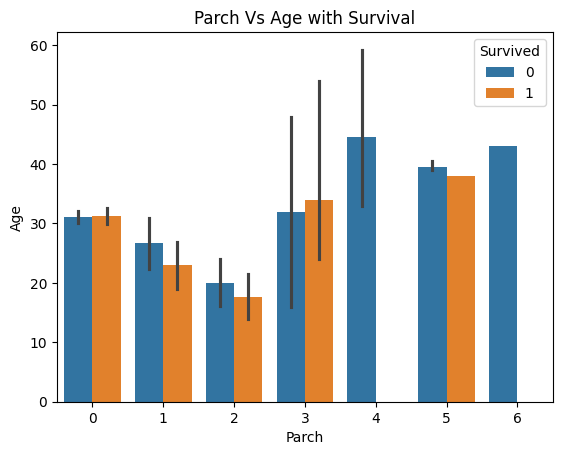

Embarked Vs Fare


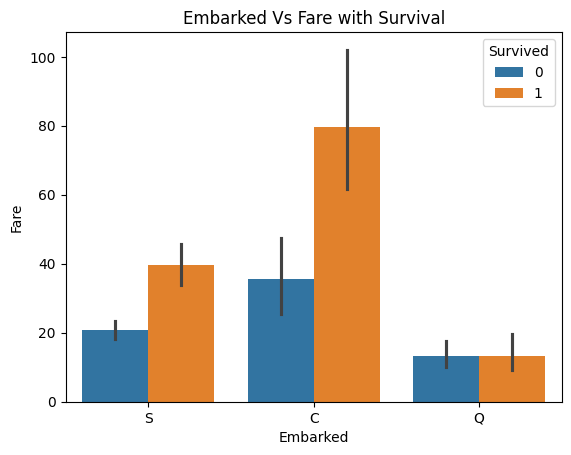

Embarked Vs Age


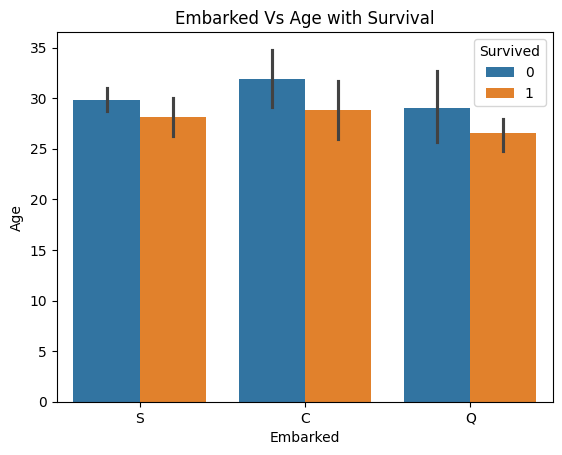

In [ ]:
for i in cat_cols:
    for j in cont_cols:
        print(i, "Vs", j)
        ls.append((i, j))
        sns.barplot(x=df[i], y=df[j], hue=df['Survived'])  # Adding hue for survival
        plt.title(f'{i} Vs {j} with Survival')
        plt.show()


We can make similar inferences for the above graphs (as we did for the previous barplot - Fare vs Pclass vs Survived).

###Pairplot

Multiple pairwise relationships with categorical variable `Survived`.

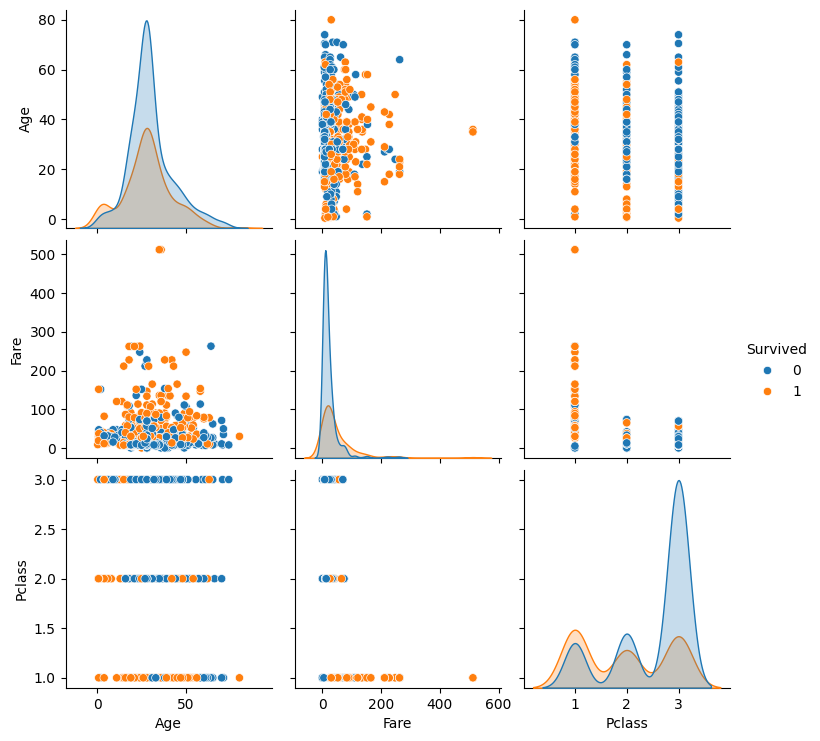

In [ ]:
# Pair plot to see pairwise relationships in the dataset
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']].dropna(), hue='Survived')
plt.show()

We can use pairplots (along with hue) for plotting three variables. In this scenario, we used 'Survived' as a hue along with other categorical and numerical variables (like Pclass and Age). Additional inferences can be made w.r.t. the 'hue' component when compared with the 2D pairplots.

### Heatmap



A heatmap showing the correlation between a continuous (numerical) and a categorical variable.

Adjusting the `figsize` for the heatmap:

<Axes: >

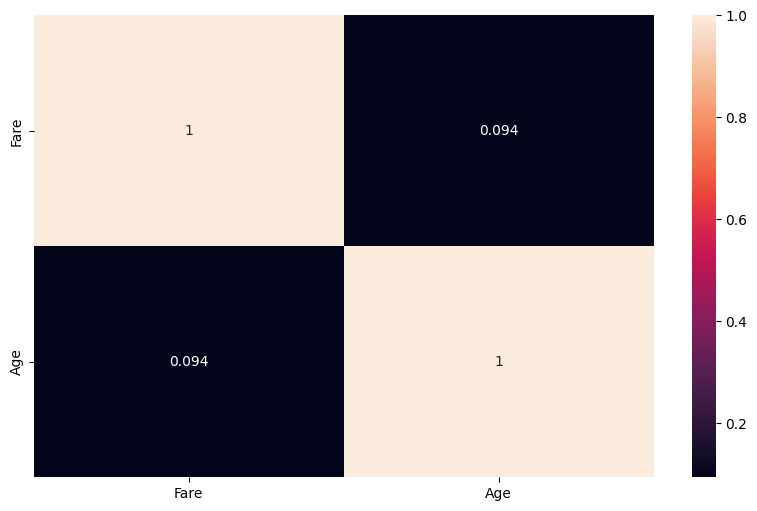

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df[cont_cols].corr(),annot=True)

A heatmap showing the correlation between continuous variables (`Age`, `Fare`, etc.) and categorical variables(`Pclass`).

The `corr()` function computes the **Pearson correlation coefficient**, which measures the linear relationship between two variables. The result is a matrix showing the correlation values between the specified columns.

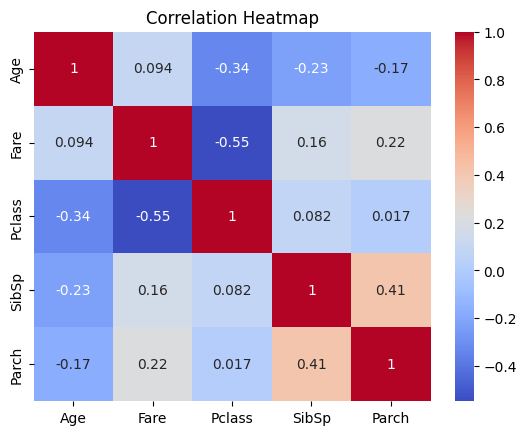

In [ ]:
corr_matrix = df[['Age', 'Fare', 'Pclass', 'SibSp', 'Parch']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

- Pclass and Fare: There is a strong negative correlation between Pclass and Fare (-$0.55$). This indicates that passengers in higher classes (lower Pclass values) tend to pay significantly more for their tickets.

- SibSp and Parch: SibSp (number of siblings/spouses aboard) and Parch (number of parents/children aboard) show a moderate positive correlation ($0.41$), which suggests that passengers who traveled with more siblings or spouses also tended to have more family members (parents or children) with them.

- Age and Other Variables: Age shows weak correlations with other variables, indicating that age is not strongly related to the number of family members aboard, passenger class, or fare paid.

- Pclass and Other Variables: Pclass has weak to moderate negative correlations with SibSp (-$0.08$) and Parch (-$0.18$), suggesting a slight tendency for passengers in lower classes to travel with more family members.

###KDE Plot

 Kernel density estimate plot for `Fare` and `Age` with hue for `Survived`.

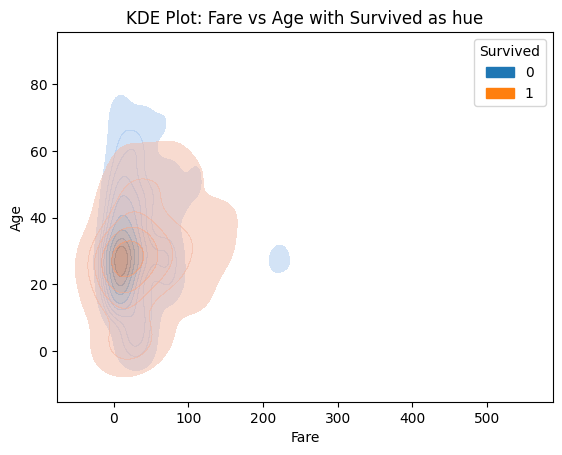

In [ ]:
# KDE plot to show density distribution of Age and Fare
sns.kdeplot(data=df, x='Fare', y='Age', hue='Survived', fill=True, alpha=0.5)  # Set alpha for transparency
plt.title('KDE Plot: Fare vs Age with Survived as hue')
plt.show()

Survivors: Survivors are generally concentrated in the lower fare range, particularly those who paid fares between $0$ and $100$, with a significant cluster of survivors in the age groups around $20$–$60$ years old.

Non-survivors: Non-survivors are spread across a wide range of fares, but they tend to cluster in the lower fare categories, particularly for passengers paying under $100.
Non-survivors also span a wider age range (more than the survivors), with a higher concentration around 20–40 years.

### Poll Question 2

What is the purpose of adding hue to the code?

(a) For adding colors

(b) For adding legends

(c) For adding trend line

(d) For adding 3rd categorical variable for multivariate analysis

Use the dataset `bivariate_multivariate_quiz.csv` for the below tasks.

### Task - 3 (Heatmap)

1 - Create an array of Numerical Columns and create a correlation matrix for them.

2 - Set the size of the heatmap figure to (10, 6).

3 - Create a heatmap of the correlation matrix with annotations.

4 - Define the title of the heatmap.

5 - Show the heatmap plot and note your observations.

### Task - 4 (Boxplot)

1 - Set the size of the figure to (10, 6).

2 -  Create a box plot for Contract vs MonthlyCharges with hue InternetService.

3 - Define the title, x & y labels, and legend.

4 - Show the plot and note your observations.

### Task - 5 (Grouped Barplot)

1 - Set the size of the figure to (10, 6).

2 - Create a grouped bar chart for InternetService, Contract, MonthlyCharges vs. Churn

3 - Define the title, x & y labels, and legend

4 - Show the plot and note your observations.

In this session, you gained hands-on experience by exploring the Titanic dataset and learned how to spot trends, such as survival rates based on class, gender, and age, or how fares varied based on these factors. You should have a strong understanding of both bivariate and multivariate data analysis and visualisation, to analyse complex datasets and derive meaningful insights.